## Analysis of Regression Methods

Description of random lasso portion of project...

In [20]:
# All required packages should go here. No where else. -jmh
%load_ext autoreload
%autoreload 2

from importlib import reload 
from RegressionTests import *
from RegressionHelpers import *
from RandomLasso import *

import numpy as np
import time
from tqdm import tqdm  # Progress Bar
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Turning off convergence warnings.
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

We know that as the ratio of features to samples increases, the accuracy of any regression algorithm will deteriorate. Let's observe this effect:

Hi-Dim Data Test | Ratio of Features to Samples Increases

## Feature to Sample Ratio Test [Hi-Dim]

In [24]:
def func1(x, y, z, ii):
    return x

def func2(x, y, z, ii):
    return y + (ii * 5)

def func3(x, y, z, ii):
    return y * 0.050

rme1, f11, runtime1, sfi1, names1 = supermassive_regression_test(
    tests=300,
    sample_start=100,
    feature_start=100,
    informative_start=5,
    sample_scale_function=func1,
    feature_scale_function=func2,
    informative_scale_function=func3,
    verbose=False
)

100%|██████████| 300/300 [09:35<00:00,  1.92s/it]


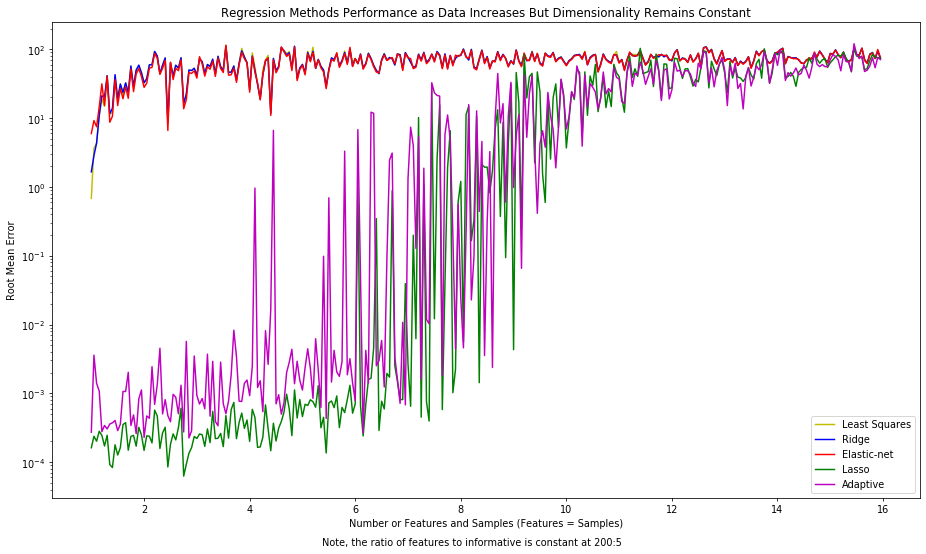

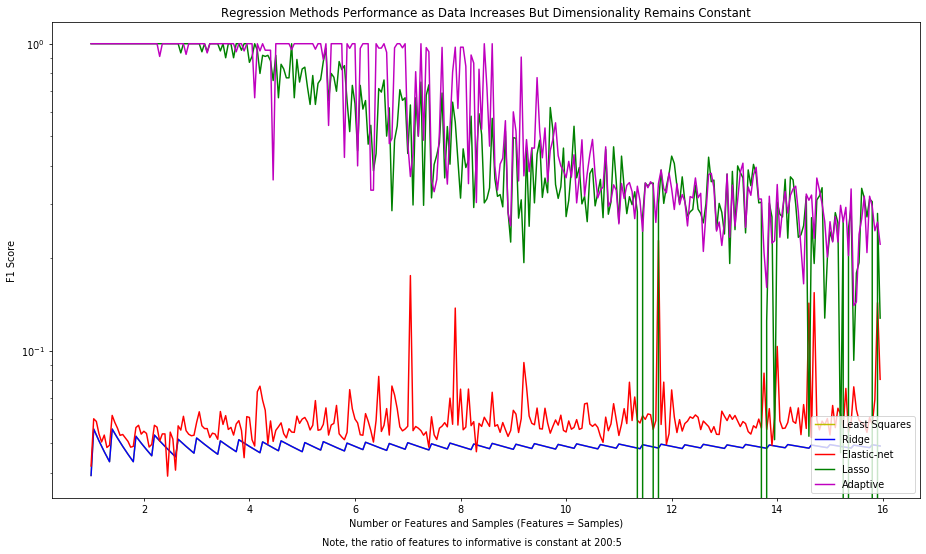

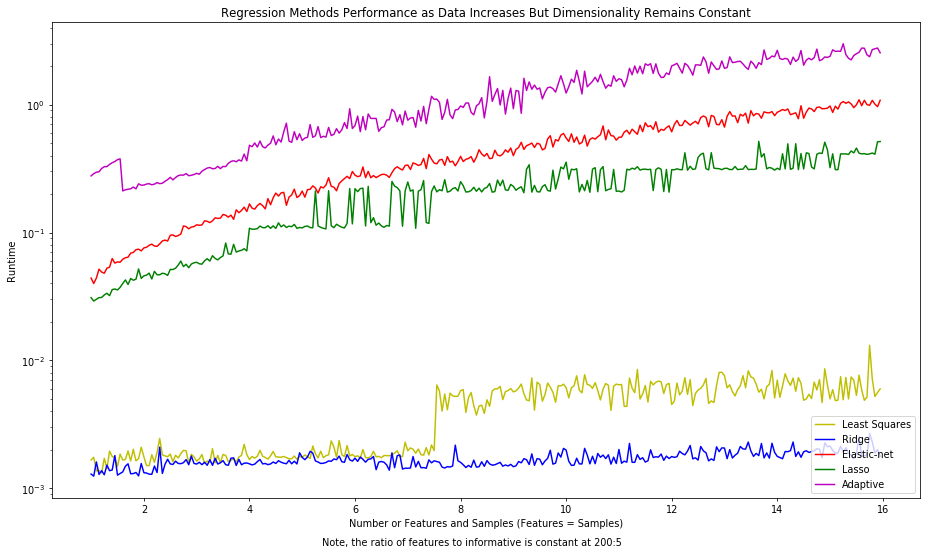

In [27]:
supermassive_regression_plot(
    title="Regression Methods Performance as Data Increases But Dimensionality Remains Constant",
    xlabel="Number or Features and Samples (Features = Samples)",
    ylabel=np.array(["Root Mean Error", "F1 Score", "Runtime"]),
    footnote="Note, the ratio of features to informative is constant at 200:5",
    xdata=(sfi1[1, :] / sfi1[0, :]),
    ydata=np.array([rme1, f11, runtime1]),
    legend=names,
    legend_loc=np.array(["lower right", "lower right", "lower right"]),
    log=True
)

## Effect of y-intercept on Standardized and Non-Standardized Data.

Testing X Non-Standardized: -0.008917526744342194
	 fit_intercept=True RME: 0.0005482207231418516
	 fit_intercept=True F1: 0.8695652173913044
	------------------------------------
	 fit_intercept=False RME: 0.0005796282750992913
	 fit_intercept=False F1: 0.8695652173913044
	------------------------------------


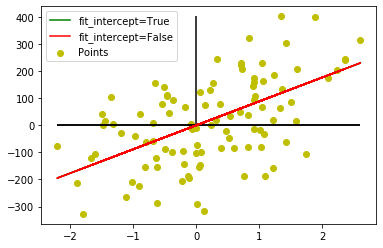

Testing X Standardized: -6.661338147750939e-19
	 fit_intercept=True RME: 0.5085321291231153
	 fit_intercept=True F1: 0.8695652173913044
	------------------------------------
	 fit_intercept=False RME: 0.7468287646227156
	 fit_intercept=False F1: 0.9473684210526316
	------------------------------------


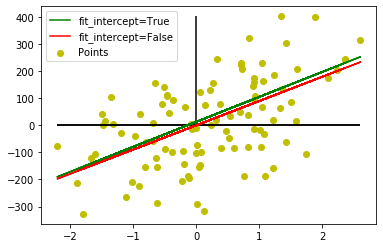

In [104]:
X, y, ground_truth = make_regression(n_samples=100,
                                     n_features=200,
                                     n_informative=10,
                                     coef=True)

# Sorting features by their importance. Most important feature in X[:, 0].
sorted_indices = np.flip(np.argsort(ground_truth))
ground_truth = ground_truth[sorted_indices]
X = X[:, sorted_indices]

print("Testing X Non-Standardized:", np.mean(X))
reg = linear_model.LassoCV().fit(X, y)
rme_u, f1_u, = \
    bulk_analysis_regression(ground_truth, reg.coef_, "fit_intercept=True", verbose=True)

regf = linear_model.LassoCV(fit_intercept=False).fit(X, y)
rme_s, f1_s, = \
    bulk_analysis_regression(ground_truth, regf.coef_, "fit_intercept=False", verbose=True)

lr_fi_true_yhat = np.dot(X[:, 0], reg.coef_[0]) + reg.intercept_
lr_fi_false_yhat = np.dot(X[:, 0], regf.coef_[0]) + regf.intercept_
plt.scatter(X[:, 0], y, color='y', label='Points')
plt.plot(X[:, 0], lr_fi_true_yhat, color='g', label='fit_intercept=True')
plt.plot(X[:, 0], lr_fi_false_yhat, color='r', label='fit_intercept=False')
plt.legend()
plt.vlines(0, 0, y.max())
plt.hlines(0, X[:, 0].min(), X[:, 0].max())
plt.hlines(0, X[:, 0].min(), X[:, 0].max())
plt.show()


X_s = scale(X)
print("Testing X Standardized:", np.mean(X_s))

reg = linear_model.LassoCV().fit(X_s, y)
rme_s, f1_s, = \
    bulk_analysis_regression(ground_truth, reg.coef_, "fit_intercept=True", verbose=True)

regf = linear_model.LassoCV(fit_intercept=False).fit(X_s, y)
rme_s, f1_s, = \
    bulk_analysis_regression(ground_truth, regf.coef_, "fit_intercept=False", verbose=True)

lr_fi_true_yhat = np.dot(X[:, 0], reg.coef_[0]) + reg.intercept_
lr_fi_false_yhat = np.dot(X[:, 0], regf.coef_[0]) + regf.intercept_
plt.scatter(X[:, 0], y, color='y', label='Points')
plt.plot(X[:, 0], lr_fi_true_yhat, color='g', label='fit_intercept=True')
plt.plot(X[:, 0], lr_fi_false_yhat, color='r', label='fit_intercept=False')
plt.legend()
plt.vlines(0, 0, y.max())
plt.hlines(0, X[:, 0].min(), X[:, 0].max())
plt.hlines(0, X[:, 0].min(), X[:, 0].max())
plt.show()

## Constant Ratio Test [Hi-Dim]

In [12]:
def func1(x, y, z, ii):
    return x + ii

def func2(x, y, z, ii):
    return y + ii

def func3(x, y, z, ii):
    return y * 0.05

rme, f1, runtime, sfi, names = supermassive_regression_test(
    tests=300,
    sample_start=20,
    feature_start=20,
    informative_start=1,
    sample_scale_function=func1,
    feature_scale_function=func2,
    informative_scale_function=func3,
    verbose=False
)

  0%|          | 0/300 [00:00<?, ?it/s]/Users/MatthewHamilton/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/MatthewHamilton/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/MatthewHamilton/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', 

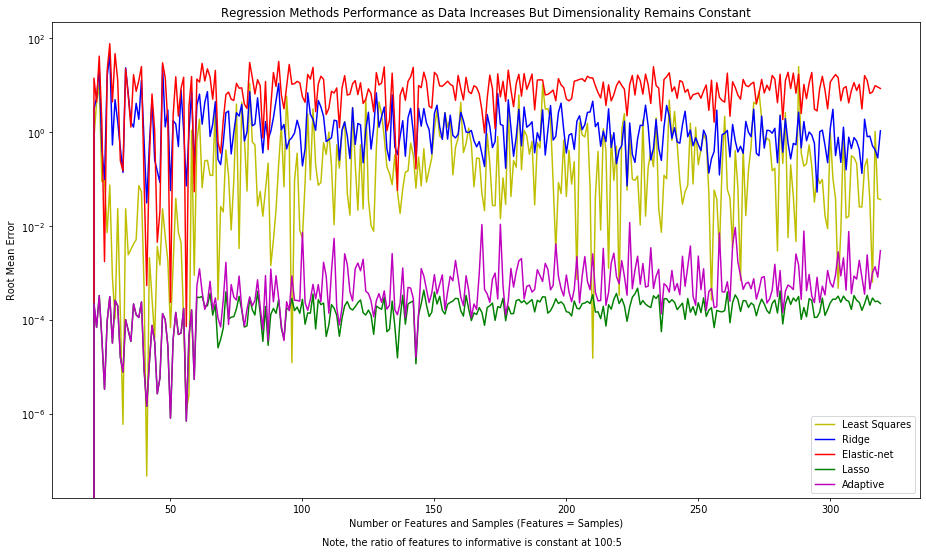

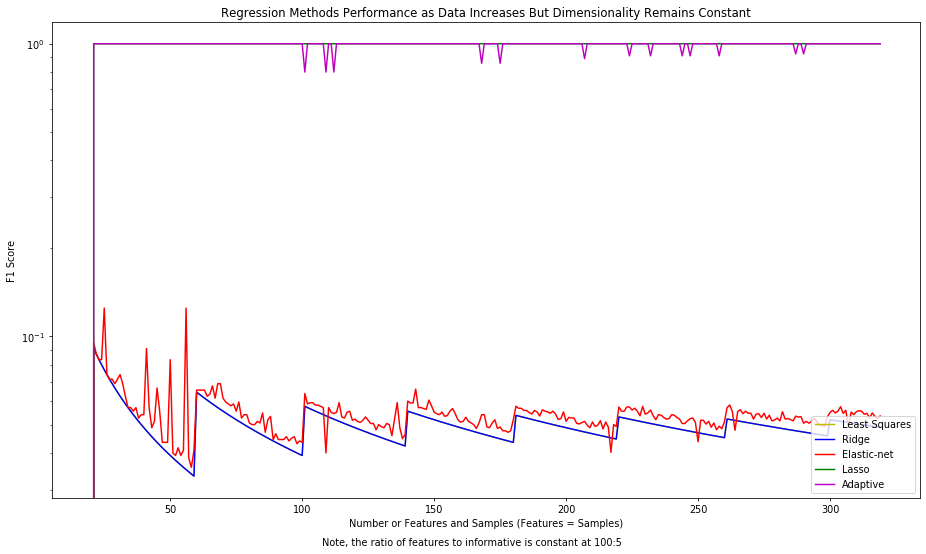

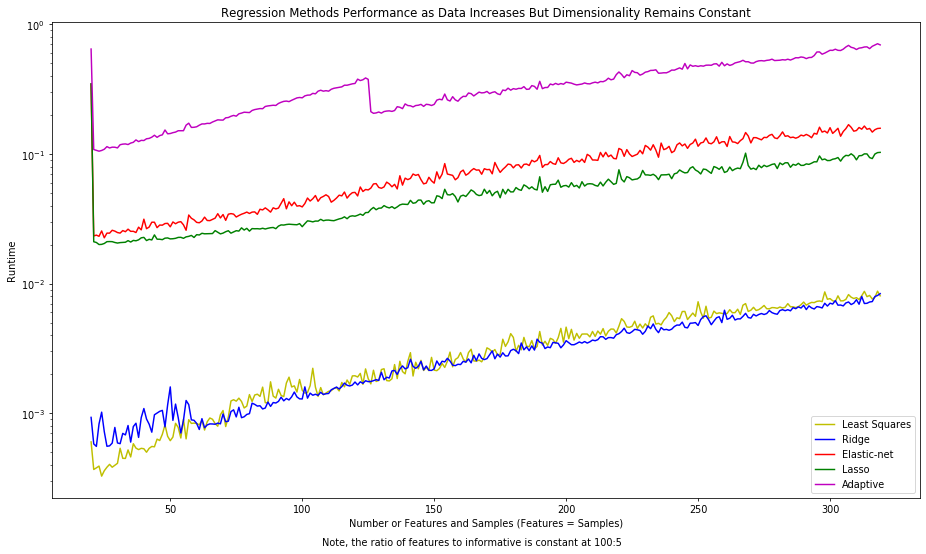

In [22]:
supermassive_regression_plot(
    title="Regression Methods Performance as Data Increases But Dimensionality Remains Constant",
    xlabel="Number or Features and Samples (Features = Samples)",
    ylabel=np.array(["Root Mean Error", "F1 Score", "Runtime"]),
    footnote="Note, the ratio of features to informative is constant at 200:5",
    xdata=sfi[0, :],
    ydata=np.array([rme, f1, runtime]),
    legend=names,
    legend_loc=np.array(["lower right", "lower right", "lower right"]),
    log=True
)